In [12]:
from fastai import *
from fastai.text import *

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("TNG.csv")

In [5]:
combos = df['Character-to'].value_counts()[:21].index

In [6]:
combos

Index(['RIKER, PICARD: ', 'PICARD, DATA: ', 'DATA, PICARD: ',
       'PICARD, RIKER: ', 'DATA, RIKER: ', 'WORF, PICARD: ', 'RIKER, DATA: ',
       'PICARD, WORF: ', 'CRUSHER, PICARD: ', 'PICARD, CRUSHER: ',
       'DATA, LAFORGE: ', 'LAFORGE, DATA: ', 'LAFORGE, PICARD: ',
       'PICARD, LAFORGE: ', 'PICARD, PICARD: ', 'WORF, RIKER: ',
       'RIKER, LAFORGE: ', 'RIKER, WORF: ', 'TROI, PICARD: ',
       'LAFORGE, RIKER: ', 'PICARD, TROI: '],
      dtype='object')

In [7]:
df['dialogue'] = df['dialogue'].str.lower()

In [8]:
valid_pct = 0.15 #validation percent
df = df.iloc[np.random.permutation(len(df))]
cut = int(valid_pct * len(df)) + 1
train_df, valid_df = df[cut:], df[:cut]

In [9]:
len(train_df), len(valid_df)

(54609, 9638)

In [10]:
nan_rows = df[df['dialogue'].isnull()]

nan_rows

,Unnamed: 0,Character,dialogue,season,chapter,to,Character-to


In [14]:
data_lm = TextLMDataBunch.from_df('data', train_df, valid_df, text_cols='dialogue',
                           label_cols='Character')

In [27]:
## create learner
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


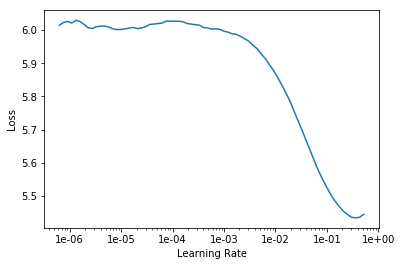

In [28]:
## run lr finder
learn.lr_find()## plot lr finder
learn.recorder.plot(skip_end=15)

In [29]:
## train for one epoch frozen
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.979776,3.776079,0.312395,23:10


In [30]:
## train for four further cycles unfrozen
learn.fit_one_cycle(4, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.735379,3.752563,0.314456,29:22
1,3.691103,3.717411,0.317352,22:06
2,3.642386,3.701749,0.319000,21:09
3,3.618804,3.699790,0.319295,20:04


In [33]:
learn.export("learner.pkl")

In [34]:
dialogues = []

for i in range(20):
    dialogue = learn.predict("xxbos", n_words=30, temperature=.9).replace("xxbos","").strip()
    dialogues.append(dialogue)

In [35]:
dialogues

["jimmy happy visit to your world already .  you 're not prepared to say , number one , but it 's n't as serious as i thought i would",
 'from the French born Robert Luc Picard , echo and honoured personnel officer and on main viewer . these events caused an outbreak of wars and',
 'considerably smaller than its previous pet minimalist point of origin , Rose provides a detailed profile of its environment . a Canadian Citizen named the Bill',
 'dissent from the william t. t. hill journey on the Western continent . Sir .  it may be interpreted as a token of the unification of the',
 "and what is it ?  here 's no need i can go , enterprise !  congratulations . your demands , which make this , be a play .",
 "well would you find it ?  my ?  shut it down .  should that 'd have been a problem ?  it 's right , quite a",
 'ophidian to the console , the borg shuttlebay cluster , and the shield assembly effect , eta to some other event .  wesley , the borg ,',
 "helm surge in water , we ca n't t